----
# ***Table Of Content***
---

1. [Import libraries and Dataset](#1-import-libraries-and-dataset)
2. [Data Preprocessing](#2-data-preprocessing)
    1. [Drop Unneeded Columns](#21-drop-unneeded-columns)
    2. [Data  Prepration](#22-data-prepration)
3. [Explatory Data Analysis](#3-Explatory-data-analysis)
    1. [Correlation Matrix](#31-correlation-matrix)
    2. [Data Visulization](#32-data_visualization)
4. [Time Series Analysis](#4-time-series-analysis)
5. [Splitting Our Dataset](#5-splitting-our-datset)
6. [Model Training](#6-model-training)
7. [Model Evaluations](#7-model-evaluations)
8. [Time Series Forcasting](#8-time-series-forcasting)

   

# ***1. Import libraries and Dataset***
---

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"E:\Full Data Science Projects\Weather Prediction Project\GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


---
# ***2. Data Preprocessing***
---

> ### ***2.1 Drop Unneeded Columns***

In [82]:
df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              3192 non-null   object 
 1   LandAverageTemperature          3180 non-null   float64
 2   LandMaxTemperature              1992 non-null   float64
 3   LandMinTemperature              1992 non-null   float64
 4   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.8+ KB


> ### ***2.2 Data  Prepration***

In [83]:
df.rename(columns={"dt": "Date", "LandAverageTemperature": "land_avg_temperature",
                   "LandMaxTemperature": "land_max_temperature", "LandMinTemperature": "land_min_temperature" ,
                   "LandAndOceanAverageTemperature" : "land_and_ocean_AVG"}, inplace=True)
df.columns

Index(['Date', 'land_avg_temperature', 'land_max_temperature',
       'land_min_temperature', 'land_and_ocean_AVG'],
      dtype='object')

In [84]:
"""
def converttemp(x):
        x = (x * 1.8) + 32
        return float(x)

df["land_avg_temperature"] = df["land_avg_temperature"].apply(converttemp)
df["land_max_temperature"] = df["land_max_temperature"].apply(converttemp)
df["land_min_temperature"] = df["land_min_temperature"].apply(converttemp)
df["land_and_ocean_AVG"] = df["land_and_ocean_AVG"].apply(converttemp)

"""

'\ndef converttemp(x):\n        x = (x * 1.8) + 32\n        return float(x)\n\ndf["land_avg_temperature"] = df["land_avg_temperature"].apply(converttemp)\ndf["land_max_temperature"] = df["land_max_temperature"].apply(converttemp)\ndf["land_min_temperature"] = df["land_min_temperature"].apply(converttemp)\ndf["land_and_ocean_AVG"] = df["land_and_ocean_AVG"].apply(converttemp)\n\n'

In [85]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
#df.drop(["Date", "month"], axis=1, inplace=True)
df.set_index("year", inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1850 to 2015
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1992 non-null   datetime64[ns]
 1   land_avg_temperature  1992 non-null   float64       
 2   land_max_temperature  1992 non-null   float64       
 3   land_min_temperature  1992 non-null   float64       
 4   land_and_ocean_AVG    1992 non-null   float64       
 5   month                 1992 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 93.4 KB


---
# ***3. Explatory Data Analysis***
---

> ### ***3.1 Correlation Matrix***

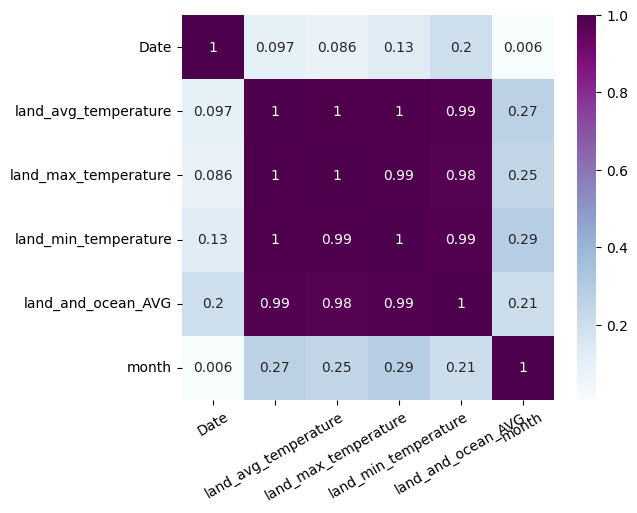

In [86]:
corr = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.xticks(rotation=30)
plt.show()

> ### **3.2 Data Visulization***

In [87]:
df_monthly = df.groupby("month").mean()
df_monthly.head(12)

,Date,land_avg_temperature,land_max_temperature,land_min_temperature,land_and_ocean_AVG
month,,,,,
1,1932-07-02 07:22:24.578313216,2.547952,8.178657,-2.934572,13.458054
2,1932-08-02 07:22:24.578313216,3.076500,8.921410,-2.672711,13.722807
3,1932-08-30 13:09:23.855421696,5.151518,11.137169,-0.866500,14.339988
4,1932-09-30 13:09:23.855421696,8.324157,14.290331,2.247699,15.215886
5,1932-10-30 13:09:23.855421696,11.241373,17.133729,5.179536,15.996398
6,1932-11-30 13:09:23.855421696,13.412976,19.226663,7.407331,16.597602
7,1932-12-30 13:09:23.855421696,14.370072,20.070217,8.423861,16.902639
8,1933-01-30 13:09:23.855421696,13.837139,19.646892,7.960934,16.809410
9,1933-03-02 13:09:23.855421696,11.997157,17.831620,6.138301,16.212114


C:\Users\SAHER MOHAMED\AppData\Local\Temp\ipykernel_28316\8660298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=df_monthly.index, y="land_avg_temperature", data=df_monthly, palette="BuPu")
C:\Users\SAHER MOHAMED\AppData\Local\Temp\ipykernel_28316\8660298.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x=df_monthly.index, y="land_and_ocean_AVG", data=df_monthly, palette="BuPu")


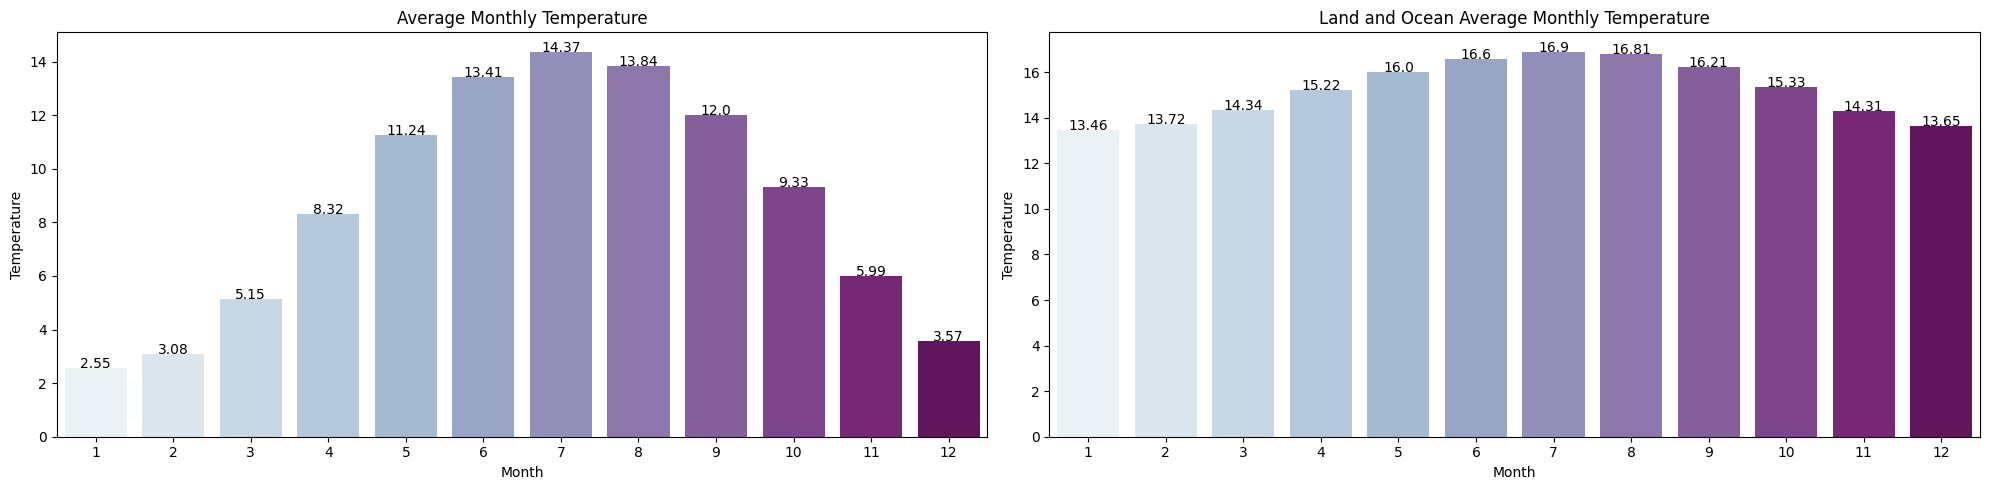

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First subplot
sns.barplot(ax=axs[0], x=df_monthly.index, y="land_avg_temperature", data=df_monthly, palette="BuPu")
axs[0].set_title("Average Monthly Temperature")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Temperature")
for i in range(1, 13):
    axs[0].text(i-1, df_monthly.loc[i, "land_avg_temperature"], round(df_monthly.loc[i, "land_avg_temperature"], 2), ha="center")

# Second subplot
sns.barplot(ax=axs[1], x=df_monthly.index, y="land_and_ocean_AVG", data=df_monthly, palette="BuPu")
axs[1].set_title("Land and Ocean Average Monthly Temperature")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Temperature")
for i in range(1, 13):
    axs[1].text(i-1, df_monthly.loc[i, "land_and_ocean_AVG"], round(df_monthly.loc[i, "land_and_ocean_AVG"], 2), ha="center")
plt.tight_layout()
plt.show()


# ***4. Time Series Analysis***
---

In [89]:
last_year = df.index.max()
last_year


2015

In [90]:
df_date_index = df.set_index("Date")
df_date_index.drop(["month"], axis=1, inplace=True)
last_year = df.index.max()
last_year

2015

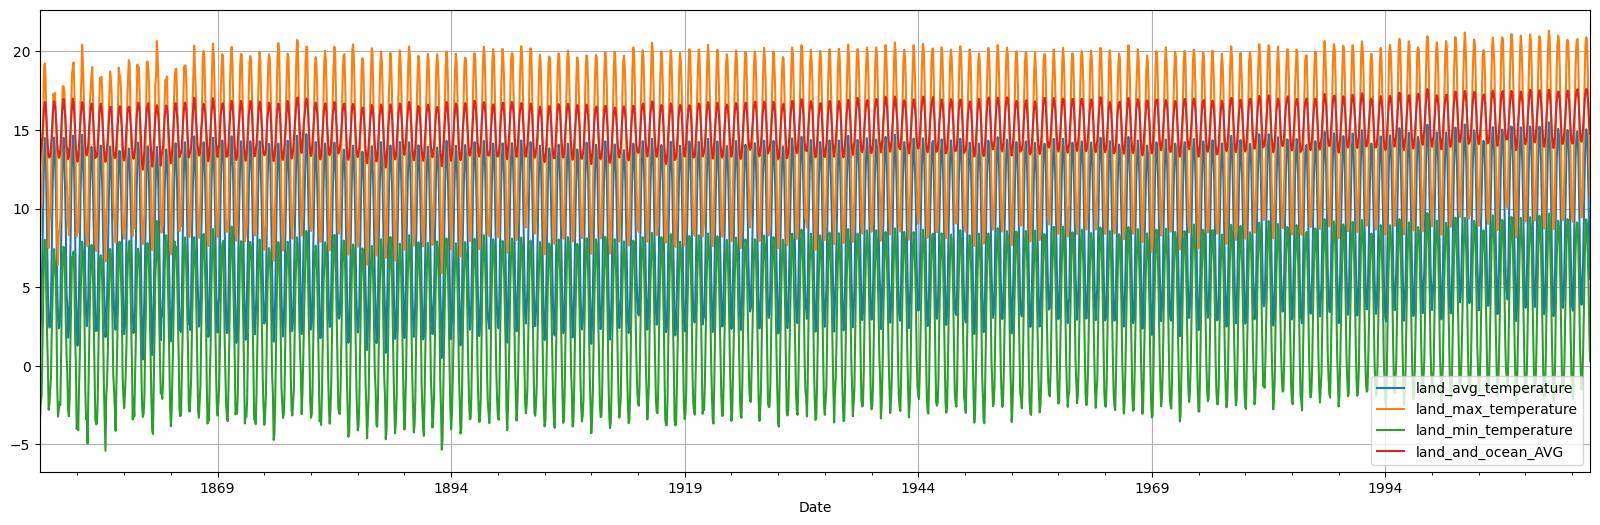

In [91]:
df_date_index.plot(figsize = (20,6), grid = True)
plt.show()

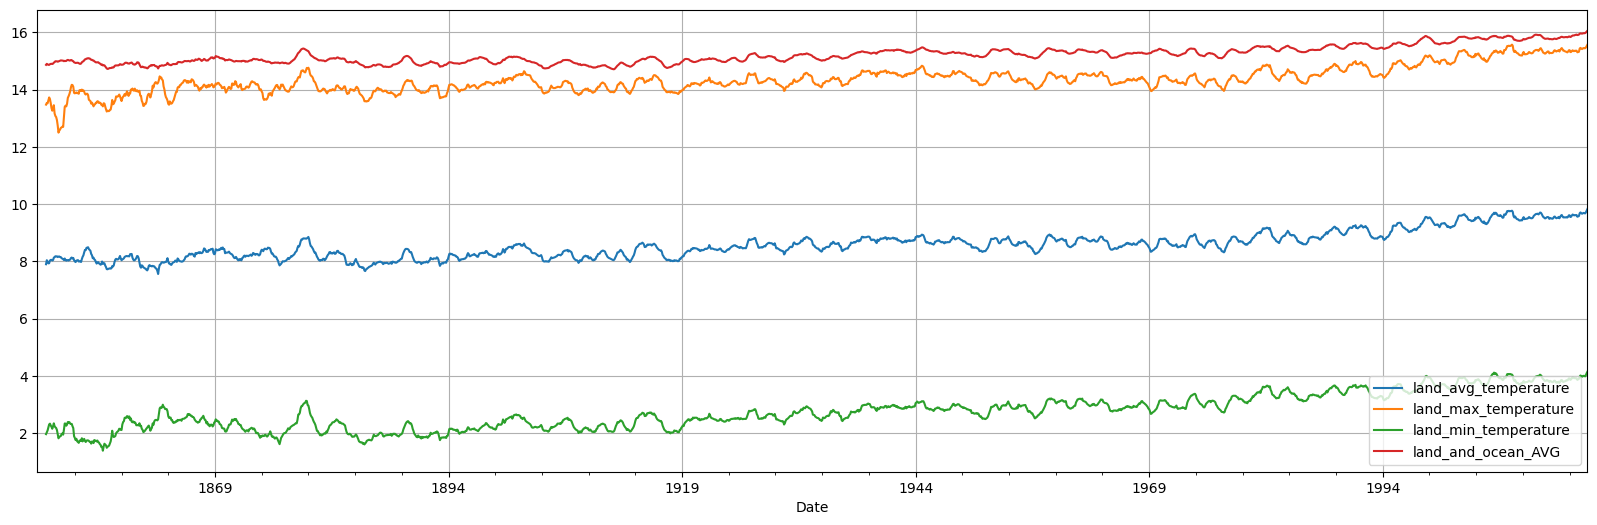

In [92]:
df_date_index.rolling(12).mean().plot(figsize = (20,6), grid = True)
plt.show()

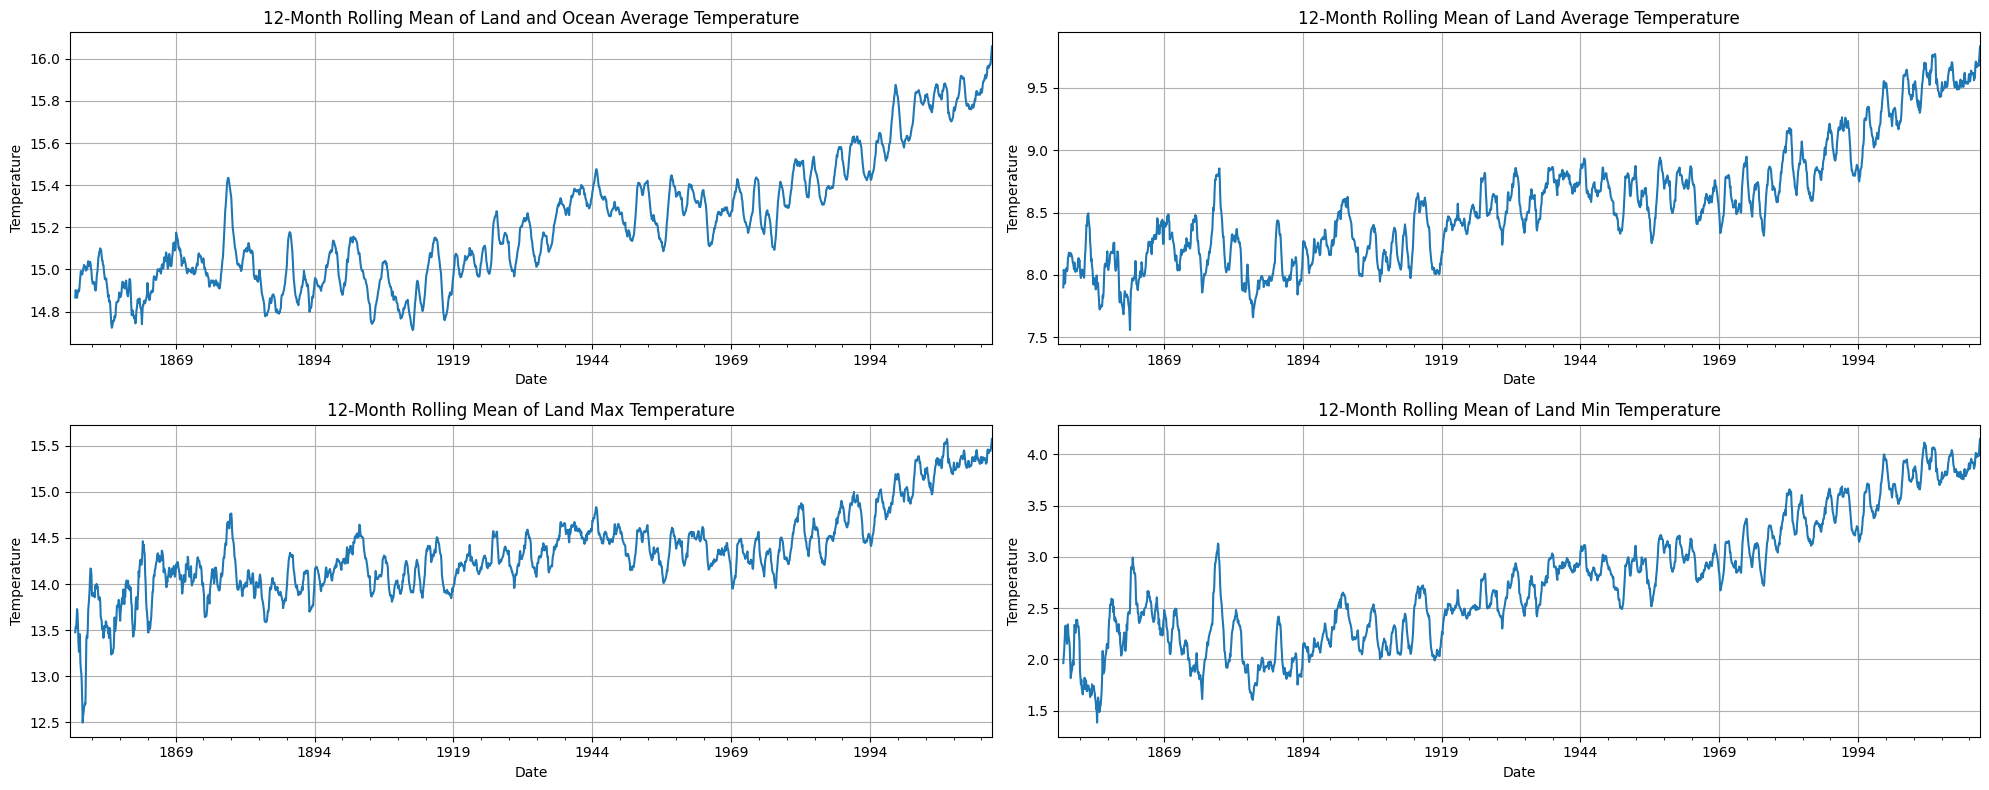

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# First subplot (top left)
df_date_index['land_and_ocean_AVG'].rolling(12).mean().plot(ax=axs[0, 0], grid=True)
axs[0, 0].set_title('12-Month Rolling Mean of Land and Ocean Average Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature')

# Second subplot (top right)
df_date_index['land_avg_temperature'].rolling(12).mean().plot(ax=axs[0, 1], grid=True)
axs[0, 1].set_title('12-Month Rolling Mean of Land Average Temperature')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Temperature')

# Third subplot (bottom left)
df_date_index['land_max_temperature'].rolling(12).mean().plot(ax=axs[1, 0], grid=True)
axs[1, 0].set_title('12-Month Rolling Mean of Land Max Temperature')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Temperature')

# Fourth subplot (bottom right)
df_date_index['land_min_temperature'].rolling(12).mean().plot(ax=axs[1, 1], grid=True)
axs[1, 1].set_title('12-Month Rolling Mean of Land Min Temperature')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Temperature')

plt.tight_layout()
plt.show()


In [94]:
# Calculate rolling means
land_and_ocean_avg_rolling = df_date_index['land_and_ocean_AVG'].rolling(12).mean()
land_avg_temperature_rolling = df_date_index['land_avg_temperature'].rolling(12).mean()
land_max_temperature_rolling = df_date_index['land_max_temperature'].rolling(12).mean()
land_min_temperature_rolling = df_date_index['land_min_temperature'].rolling(12).mean()

# Find the peak year for each feature
peak_year_land_and_ocean_avg = land_and_ocean_avg_rolling.idxmax().year
peak_year_land_avg_temperature = land_avg_temperature_rolling.idxmax().year
peak_year_land_max_temperature = land_max_temperature_rolling.idxmax().year
peak_year_land_min_temperature = land_min_temperature_rolling.idxmax().year

# Print the peak years
print(f"Peak year for Land and Ocean Average Temperature: {peak_year_land_and_ocean_avg}")
print(f"Peak year for Land Average Temperature: {peak_year_land_avg_temperature}")
print(f"Peak year for Land Max Temperature: {peak_year_land_max_temperature}")
print(f"Peak year for Land Min Temperature: {peak_year_land_min_temperature}")


Peak year for Land and Ocean Average Temperature: 2015
Peak year for Land Average Temperature: 2015
Peak year for Land Max Temperature: 2015
Peak year for Land Min Temperature: 2015


### **We can conclude from this that the weather is getting warmer each year. I predict that we are getting closer to the sun each year, BTW. 🤣**

# ***5. Splitting Our Dataset***
---

In [95]:
target = "land_and_ocean_AVG"
y = df[target]
x = df[["land_avg_temperature", "land_max_temperature", "land_min_temperature"]]

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


# ***6. Model Training***
---

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    SelectKBest(k="all"), # means all features are passed to the model without any selection
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
model.fit(x_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

# ***7. Model Evaluations***


In [104]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print("Train Error: ", round(train_error, 5))
print("Test Error: ", round(test_error, 5))


Train Error:  0.00442
Test Error:  0.03124


In [102]:
# accuracy
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print("Train Accuracy: ", round(train_accuracy, 5))
print("Test Accuracy: ", round(test_accuracy, 5))

Train Accuracy:  0.9973
Test Accuracy:  0.98032


# ***8. Time Series Forcasting***


18:55:30 - cmdstanpy - INFO - Chain [1] start processing
18:55:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\SAHER MOHAMED\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\SAHER MOHAMED\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


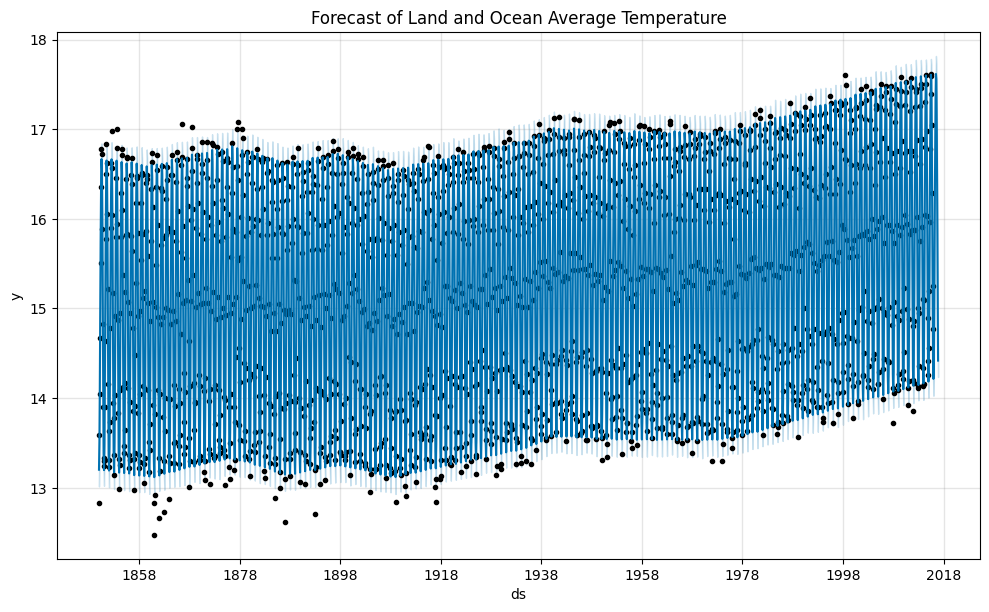

In [118]:
# Prepare data for Prophet
df_prophet = df.reset_index()
df_prophet.rename(columns={'Date': 'ds', 'land_and_ocean_AVG': 'y'}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=12, freq='M')  # Adjust periods as needed
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Land and Ocean Average Temperature')
plt.show()


In [121]:
def predict_temperature(date_str):
    future_date = pd.to_datetime(date_str)
    
    # Create a dataframe for the future date
    future_df = pd.DataFrame({'ds': [future_date]})
    
    # Predict the temperature for the future date
    forecast = model.predict(future_df)
    prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[0]
    
    return prediction

user_date = '2024-07-01'  # User input
prediction = predict_temperature(user_date)
print(f"Prediction for {user_date}:")
print(f"Predicted Temperature: {prediction['yhat']:.2f}")
print(f"Predicted Interval: [{prediction['yhat_lower']:.2f}, {prediction['yhat_upper']:.2f}]")


Prediction for 2024-07-01:
Predicted Temperature: 17.78
Predicted Interval: [17.58, 17.96]
